# Data Understanding (EDA) - Prague Airbnb Listings

**Goal:** Explore the `listings.csv` dataset to understand its structure, identify potential issues (missing values, outliers, data types), and gain initial insights into factors influencing Airbnb prices in Prague.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Format floats nicely

# Configure plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

print("Libraries imported and settings configured.")

Libraries imported and settings configured.


## 1. Load Data
Load the detailed listings data.

In [3]:
# Define the path
listings_path = '../data/raw/listings.csv'

# Load the dataset
try:
    df_listings = pd.read_csv(listings_path, low_memory=False)
    print(f"Successfully loaded {listings_path}")
    print(f"Shape: {df_listings.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {listings_path}. Make sure you downloaded and unzipped it.")
except Exception as e:
    print(f"An error occurred during loading: {e}")

# Display first few rows
if 'df_listings' in locals():
    display(df_listings.head())

Successfully loaded ../data/raw/listings.csv
Shape: (10108, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23163,https://www.airbnb.com/rooms/23163,20250316041547,2025-03-16,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,https://www.airbnb.com/users/show/5282,Klara,2008-12-17,"Prague, Czechia","Hello, \r\nglad to see that you are interested...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/b7309...,https://a0.muscache.com/im/pictures/user/b7309...,Josefov,72.00,82.00,"['email', 'phone']",t,t,NaN,Praha 1,NaN,50.08,14.42,Entire rental unit,Entire home/apt,4,1.00,1 bath,1.00,2.00,"[""Coffee maker"", ""Dishwasher"", ""Bed linens"", ""...","$2,918.00",1,365,1,7,60,731,1.40,663.60,NaN,t,0,0,0,0,2025-03-16,31,1,0,0,1,6,17508.00,2010-09-20,2024-06-15,4.90,4.83,5.00,5.00,4.97,4.93,4.86,NaN,t,70,69,0,0,0.18
1,23169,https://www.airbnb.com/rooms/23169,20250316041547,2025-03-16,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,https://www.airbnb.com/users/show/5282,Klara,2008-12-17,"Prague, Czechia","Hello, \r\nglad to see that you are interested...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/b7309...,https://a0.muscache.com/im/pictures/user/b7309...,Josefov,72.00,82.00,"['email', 'phone']",t,t,NaN,Praha 1,NaN,50.09,14.42,Entire rental unit,Entire home/apt,3,1.00,1 bath,1.00,2.00,"[""Patio or balcony"", ""Coffee maker"", ""Bed line...",NaN,1,365,1,7,60,731,1.20,710.60,NaN,t,7,13,13,13,2025-03-16,122,6,0,13,8,36,NaN,2010-05-07,2024-11-08,4.74,4.60,4.83,4.81,4.87,4.97,4.70,NaN,t,70,69,0,0,0.67
2,26755,https://www.airbnb.com/rooms/26755,20250316041547,2025-03-16,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,https://www.airbnb.com/users/show/113902,Daniel+Bea,2010-04-26,"Prague, Czechia",Hi! we are a sp/cz couple with 2 daughters (La...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/8db01...,https://a0.muscache.com/im/pictures/user/8db01...,Staré Město,4.00,4.00,"['email', 'phone']",t,t,"Prague, Hlavní město Praha, Czechia",Praha 1,NaN,50.09,14.43,Entire rental unit,Entire home/apt,4,1.50,1.5 baths,1.00,2.00,"[""AC - split type ductless system"", ""Coffee ma...","$1,582.00",3,700,3,4,1125,1125,3.10,1125.00,NaN,t,3,7,24,173,2025-03-16,411,53,3,173,57,255,403410.00,2015-05-19,2025-03-07,4.94,4.95,4.92,4.93,4.96,4.93,4.90,NaN,f,3,3,0,0,3.43
3,78

## 2. Initial Inspection

Let's start by getting a feel for the data. We'll look at:
*   The first few rows to see example values.
*   The overall size (number of rows/listings and columns/features).
*   A summary of column data types and non-null counts.
*   Basic descriptive statistics for all columns.

### Display First 5 Rows
View the first few entries to understand the data format and example values.

In [36]:
# Display the first 5 rows
if 'df_listings' in locals():
    print("First 5 rows of the dataset:")
    display(df_listings.head())
else:
    print("Error: df_listings not found. Please load the data first.")

First 5 rows of the dataset:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_cleaned,log_price
0,23163,https://www.airbnb.com/rooms/23163,20250316041547,2025-03-16,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,https://www.airbnb.com/users/show/5282,Klara,2008-12-17,"Prague, Czechia","Hello, \r\nglad to see that you are interested...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/b7309...,https://a0.muscache.com/im/pictures/user/b7309...,Josefov,72.00,82.00,"['email', 'phone']",t,t,NaN,Praha 1,NaN,50.08,14.42,Entire rental unit,Entire home/apt,4,1.00,1 bath,1.00,2.00,"[""Coffee maker"", ""Dishwasher"", ""Bed linens"", ""...","$2,918.00",1,365,1,7,60,731,1.40,663.60,NaN,t,0,0,0,0,2025-03-16,31,1,0,0,1,6,17508.00,2010-09-20,2024-06-15,4.90,4.83,5.00,5.00,4.97,4.93,4.86,NaN,t,70,69,0,0,0.18,2918,7.98
1,23169,https://www.airbnb.com/rooms/23169,20250316041547,2025-03-16,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,https://www.airbnb.com/users/show/5282,Klara,2008-12-17,"Prague, Czechia","Hello, \r\nglad to see that you are interested...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/b7309...,https://a0.muscache.com/im/pictures/user/b7309...,Josefov,72.00,82.00,"['email', 'phone']",t,t,NaN,Praha 1,NaN,50.09,14.42,Entire rental unit,Entire home/apt,3,1.00,1 bath,1.00,2.00,"[""Patio or balcony"", ""Coffee maker"", ""Bed line...",NaN,1,365,1,7,60,731,1.20,710.60,NaN,t,7,13,13,13,2025-03-16,122,6,0,13,8,36,NaN,2010-05-07,2024-11-08,4.74,4.60,4.83,4.81,4.87,4.97,4.70,NaN,t,70,69,0,0,0.67,<NA>,<NA>
2,26755,https://www.airbnb.com/rooms/26755,20250316041547,2025-03-16,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,https://www.airbnb.com/users/show/113902,Daniel+Bea,2010-04-26,"Prague, Czechia",Hi! we are a sp/cz couple with 2 daughters (La...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/8db01...,https://a0.muscache.com/im/pictures/user/8db01...,Staré Město,4.00,4.00,"['email', 'phone']",t,t,"Prague, Hlavní město Praha, Czechia",Praha 1,NaN,50.09,14.43,Entire rental unit,Entire home/apt,4,1.50,1.5 baths,1.00,2.00,"[""AC - split type ductless system"", ""Coffee ma...","$1,582.00",3,700,3,4,1125,1125,3.10,1125.00,NaN,t,3,7,24,173,2025-03-16,411,53,3,173,57,255,403410.00,2015-05-19,2025-03-07,4.94,4.95,4.92

*Observation:* Shows various data types including IDs, text, URLs, and what looks like string-formatted prices and dates.

### Display Dataset Dimensions
Check the total number of rows (listings) and columns (features).

In [5]:
# Display the shape (number of rows, number of columns)
if 'df_listings' in locals():
    print(f"Dataset dimensions (rows, columns): {df_listings.shape}")

Dataset dimensions (rows, columns): (10108, 79)


*Observation:* The dataset has 10,108 listings and 79 features.


### Display Column Info Summary
Get a summary of columns, their data types (Dtype), and the count of non-null values.

In [6]:
# Display concise summary: column names, non-null counts, Dtypes, memory usage
if 'df_listings' in locals():
    print("\nDataFrame Info Summary:")
    # Use verbose=True and show_counts=True for the detailed view matching the user's example
    df_listings.info(verbose=True, show_counts=True)


DataFrame Info Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10108 non-null  int64  
 1   listing_url                                   10108 non-null  object 
 2   scrape_id                                     10108 non-null  int64  
 3   last_scraped                                  10108 non-null  object 
 4   source                                        10108 non-null  object 
 5   name                                          10108 non-null  object 
 6   description                                   9867 non-null   object 
 7   neighborhood_overview                         4638 non-null   object 
 8   picture_url                                   10108 non-null  object 
 9   host_id                             

*Observations:*
*   Mix of `int64`, `float64`, and `object` types. 34 `object` columns suggest need for cleaning/conversion.
*   Several columns have missing values (e.g., `description`, `neighborhood_overview`, `bathrooms`, `price`, review scores).
*   Columns `neighbourhood_group_cleansed`, `calendar_updated`, `license` are entirely empty.

### Display Descriptive Statistics
Calculate summary statistics for all columns (numeric and categorical/object).

In [4]:
# Get descriptive statistics for all columns (numeric and object)
if 'df_listings' in locals():
    print("\nDescriptive Statistics (All Columns):")
    display(df_listings.describe(include='all').T) # Transpose for better readability


Descriptive Statistics (All Columns):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10108.00,NaN,NaN,NaN,610808945167279360.00,538031787067269376.00,23163.00,32809559.25,744600497253443456.00,1128375528908403072.00,1376687962067046400.00
listing_url,10108,10108,https://www.airbnb.com/rooms/1376687962067046501,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,10108.00,NaN,NaN,NaN,20250316041547.00,0.00,20250316041547.00,20250316041547.00,20250316041547.00,20250316041547.00,20250316041547.00
last_scraped,10108,1,2025-03-16,10108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,10108,2,city scrape,8870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,10108,9639,Hostel HOMEr - 12 bed mixed room,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,9867,7895,In this quiet place in the middle of the actio...,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,4638,2919,The apartment is located in one of the best lo...,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,10108,9796,https://a0.muscache.com/pictures/799e1836-3bfb...,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,10108.00,NaN,NaN,NaN,212674181.73,211450878.15,5282.00,24870251.00,122509558.00,419022428.00,683899729.00


*Observations:*
*   Numeric columns: Shows count, mean, std dev, min, max, quartiles. Reveals ranges and potential outliers (e.g., high `maximum_nights`).
*   Object columns: Shows count, unique values, top value, frequency. Confirms `price` is object type. Shows cardinality of categoricals (`room_type`, `neighbourhood_cleansed`). Identifies potential boolean columns ('t'/'f').

## 3. Target Variable Analysis (`price`)

We will inspect the `price` column, our target variable for prediction. This involves:
*   Checking its data type.
*   Cleaning it to a numeric format if it's stored as text (e.g., removing currency symbols).
*   Visualizing its distribution (raw and log-transformed) to understand its spread and skewness.
*   Checking for missing values.

### Check Initial Data Type
Determine the current data type of the `price` column.

In [23]:
# Check initial data type of 'price'
if 'df_listings' in locals() and 'price' in df_listings.columns:
    price_dtype = df_listings['price'].dtype
    print(f"Initial 'price' dtype: {price_dtype}")
else:
    print("Error: df_listings or 'price' column not found.")

Initial 'price' dtype: object


*Observation:* The `price` column is of type `object`, indicating it's stored as text and needs cleaning before numerical analysis.

### Clean and Convert Price (Preliminary)
Clean the `price` column (remove '$', ','). Convert to numeric float first, then check if all values are whole numbers. If so, attempt conversion to a nullable Integer type (`Int64`) for cleaner representation. Display results and example values.

In [30]:
# Clean the price column and attempt Int64 conversion
if 'df_listings' in locals() and 'price' in df_listings.columns:
    if df_listings['price'].dtype == 'object':
        print("Attempting to clean 'price' column into 'price_cleaned'...")
        temp_price_float = df_listings['price'].astype(str).str.replace('[$,]', '', regex=True)
        temp_price_float = pd.to_numeric(temp_price_float, errors='coerce') # Convert to float first

        # Check if all non-NaN values are integers
        is_integer = (temp_price_float.dropna() % 1 == 0).all()
        print(f"Are all non-NaN cleaned values whole numbers? {is_integer}")

        if is_integer:
            print("Attempting conversion to nullable Int64 type.")
            # Use astype('Int64') which supports NaN
            df_listings['price_cleaned'] = temp_price_float.astype('Int64')
        else:
            print("Values contain decimals, keeping as float64.")
            df_listings['price_cleaned'] = temp_price_float

        # Check results
        print(f"Created 'price_cleaned' with dtype: {df_listings['price_cleaned'].dtype}")
        original_non_null = df_listings['price'].notnull().sum()
        cleaned_non_null = df_listings['price_cleaned'].notnull().sum()
        failed_conversions = original_non_null - cleaned_non_null # Should still be 0 based on prior info
        print(f"Original non-null prices: {original_non_null}")
        print(f"Cleaned non-null prices: {cleaned_non_null}")
        if failed_conversions > 0:
            print(f"Prices that failed conversion to numeric: {failed_conversions}")
        else:
            print("All original non-null prices were convertible.")

        # Display some basic stats and examples
        print("\nDescriptive statistics for 'price_cleaned':")
        # .describe() works on Int64 too
        display(df_listings['price_cleaned'].describe())
        print("\nExample values for 'price_cleaned' (comparing with original):")
        display(df_listings[['price', 'price_cleaned']].head(25)) # Show more rows

    elif pd.api.types.is_numeric_dtype(df_listings['price']):
         print("'price' column is already numeric.")
         # Check if already integer or can be converted
         temp_price_float = df_listings['price']
         is_integer = (temp_price_float.dropna() % 1 == 0).all()
         print(f"Are all non-NaN values whole numbers? {is_integer}")
         if is_integer and not pd.api.types.is_integer_dtype(temp_price_float):
             print("Attempting conversion to nullable Int64 type.")
             df_listings['price_cleaned'] = temp_price_float.astype('Int64')
         else:
             df_listings['price_cleaned'] = temp_price_float # Keep as is (float or existing int)

         print(f"Using/Created 'price_cleaned' with dtype: {df_listings['price_cleaned'].dtype}")
         print("\nDescriptive statistics for 'price_cleaned':")
         display(df_listings['price_cleaned'].describe())
         print("\nExample values for 'price_cleaned':")
         display(df_listings['price_cleaned'].head(25))

    else:
        print("Warning: 'price' column is not 'object' or numeric. Manual check needed.")

Attempting to clean 'price' column into 'price_cleaned'...
Are all non-NaN cleaned values whole numbers? True
Attempting conversion to nullable Int64 type.
Created 'price_cleaned' with dtype: Int64
Original non-null prices: 8808
Cleaned non-null prices: 8808
All original non-null prices were convertible.

Descriptive statistics for 'price_cleaned':


count     8808.00
mean      2730.52
std       8349.63
min        223.00
25%       1242.75
50%       1762.00
75%       2641.00
max     251025.00
Name: price_cleaned, dtype: Float64


Example values for 'price_cleaned' (comparing with original):


,price,price_cleaned
0,"$2,918.00",2918
1,NaN,<NA>
2,"$1,582.00",1582
3,$860.00,860
4,$629.00,629
5,$772.00,772
6,"$2,389.00",2389
7,"$1,768.00",1768
8,"$2,656.00",2656
9,"$2,882.00",2882


*Observation:* The `price` column was cleaned, and since all convertible values were whole numbers, it was successfully stored as a nullable `Int64` type in `price_cleaned`. This provides a cleaner representation. Descriptive statistics confirm the range and distribution, with the mean still higher than the median, indicating skewness. The side-by-side comparison shows the conversion and propagation of missing values.

### Check Missing Values in Cleaned Price
Calculate the number and percentage of missing values in our potentially usable numeric price column (`price_cleaned`).

In [24]:
# Check for missing values in the cleaned price
if 'df_listings' in locals() and 'price_cleaned' in df_listings.columns:
    missing_prices = df_listings['price_cleaned'].isnull().sum()
    total_listings = len(df_listings)
    missing_percentage = (missing_prices / total_listings) * 100
    print(f"Missing values in 'price_cleaned': {missing_prices} ({missing_percentage:.2f}%)")
else:
    print("Error: df_listings or 'price_cleaned' column not found.")

Missing values in 'price_cleaned': 1300 (12.86%)


*Observation:* Approximately 12.86% of listings are missing a price value. These listings likely cannot be used directly for training or evaluating the price prediction model.

### Visualize Price Distribution (Cleaned)
Plot the distribution of the numeric `price_cleaned` using a histogram and boxplot to understand its shape and identify potential outliers.

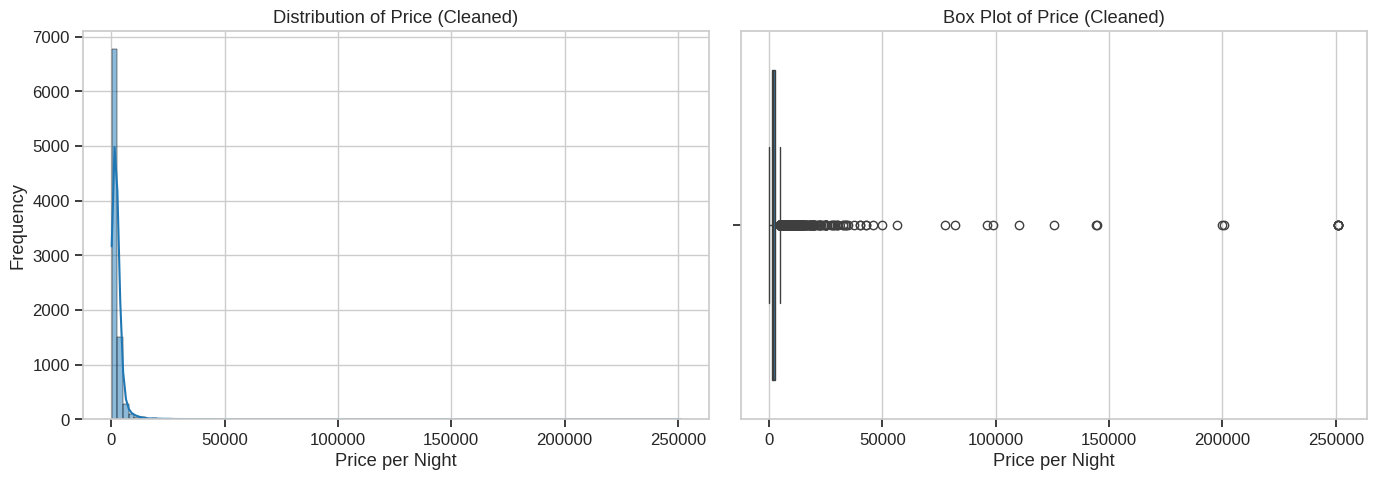


Price Skewness: 23.42
Price distribution is significantly skewed.


In [25]:
# Analyze the distribution of the cleaned price
if 'df_listings' in locals() and 'price_cleaned' in df_listings.columns:
    # Drop NA values for plotting distribution
    prices_to_plot = df_listings['price_cleaned'].dropna()

    if not prices_to_plot.empty:
        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        # Convert Int64 to float for plotting to ensure compatibility with seaborn kde
        sns.histplot(prices_to_plot.astype(float), kde=True, bins=100)
        plt.title('Distribution of Price (Cleaned)')
        plt.xlabel('Price per Night')
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=prices_to_plot.astype(float))
        plt.title('Box Plot of Price (Cleaned)')
        plt.xlabel('Price per Night')

        plt.tight_layout()
        plt.show()

        # Check skewness
        skewness = prices_to_plot.skew()
        print(f"\nPrice Skewness: {skewness:.2f}")
        if skewness > 1 or skewness < -1:
            print("Price distribution is significantly skewed.")
    else:
        print("No valid price data to plot.")

*Observation:* The price distribution is heavily right-skewed (skewness: 23.42), confirming the visual impression from the plots. Most listings are clustered at lower prices, but the visualization is dominated by the long tail of high-priced outliers (extending up to ~250k), making the bulk of the distribution difficult to inspect in detail on this scale. This extreme skewness strongly indicates potential outliers and reinforces the need for a log transformation for modeling.

### Visualize Log-Transformed Price Distribution
Apply a log transformation (`log1p` to handle potential zeros) to the price and visualize its distribution. This often helps normalize skewed data and can make the distribution of the bulk of the data more visible.

Created 'log_price' column with dtype: Float64


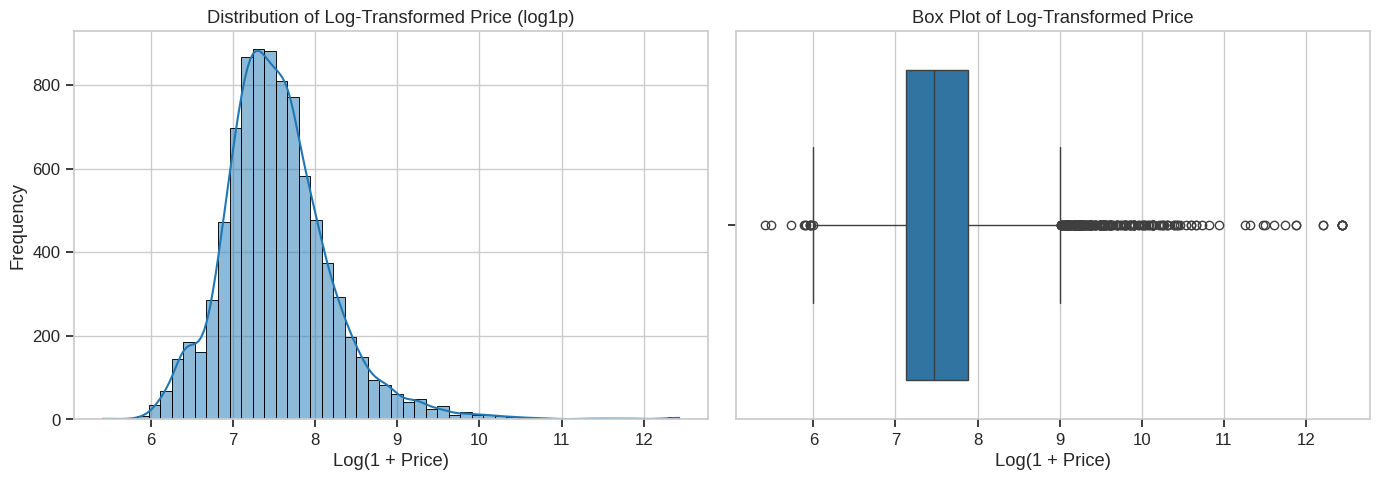


Log Price Skewness: 1.21
Log-transformed price distribution is still significantly skewed.


In [31]:
# Analyze the distribution of log-transformed price
if 'df_listings' in locals() and 'price_cleaned' in df_listings.columns:
    # Use log1p to handle potential zero prices gracefully (log(0) is undefined, log1p(0) = log(1) = 0)
    # Create the log_price column, handling potential NaNs in price_cleaned
    # np.log1p works fine with Int64 input, result is float
    df_listings['log_price'] = np.log1p(df_listings['price_cleaned'])
    print(f"Created 'log_price' column with dtype: {df_listings['log_price'].dtype}")

    # Drop NA values for plotting distribution
    log_prices_to_plot = df_listings['log_price'].dropna()

    if not log_prices_to_plot.empty:
        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(log_prices_to_plot, kde=True, bins=50)
        plt.title('Distribution of Log-Transformed Price (log1p)')
        plt.xlabel('Log(1 + Price)')
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=log_prices_to_plot)
        plt.title('Box Plot of Log-Transformed Price')
        plt.xlabel('Log(1 + Price)')

        plt.tight_layout()
        plt.show()

        # Check skewness of log-transformed price
        log_skewness = log_prices_to_plot.skew()
        print(f"\nLog Price Skewness: {log_skewness:.2f}")
        if -0.5 < log_skewness < 0.5:
            print("Log-transformed price distribution is approximately symmetric.")
        elif -1 < log_skewness < 1:
             print("Log-transformed price distribution is moderately skewed.")
        else:
             print("Log-transformed price distribution is still significantly skewed.")
    else:
        print("No valid log_price data to plot.")

*Observation:* The log transformation (`log1p`) significantly improved the symmetry of the price distribution compared to the raw price, making the central tendency more apparent (Skewness reduced from ~23.4 to 1.21). However, with a skewness of 1.21, it remains noticeably right-skewed, and the boxplot still indicates high-end outliers on the log scale. Despite this, `log_price` is a much better-behaved variable for modeling purposes than the original price and will likely be used as the target variable.

## 4. Missing Values Analysis

We will now examine the extent and patterns of missing data across the entire dataset. This helps identify columns that might need removal or imputation later. This involves:
*   Calculating the count and percentage of missing values per column.
*   Visualizing the locations of missing values using a matrix plot.
*   Visualizing if missingness in one column correlates with missingness in others using a heatmap.

### Calculate Missing Value Counts and Percentages
Compute and display the number and proportion of missing values for each column, sorted to show the most affected columns first.

In [32]:
# Calculate missing values count and percentage
if 'df_listings' in locals():
    missing_counts = df_listings.isnull().sum()

    # Filter out columns with no missing values before calculating percentage
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

    if not missing_counts.empty:
        missing_percentages = (missing_counts / len(df_listings) * 100)

        # Create a DataFrame for better display
        missing_df = pd.DataFrame({
            'Missing Count': missing_counts,
            'Percentage (%)': missing_percentages
        })

        print(f"Columns with Missing Values (Total: {len(missing_df)}):")
        # Display all columns with missing values
        with pd.option_context('display.max_rows', None): # Temporarily show all rows
            display(missing_df)
    else:
        print("No missing values found in the dataset.")
else:
    print("Error: df_listings not found.")

Columns with Missing Values (Total: 41):


,Missing Count,Percentage (%)
neighbourhood_group_cleansed,10108,100.00
calendar_updated,10108,100.00
license,10108,100.00
neighbourhood,5470,54.12
neighborhood_overview,5470,54.12
host_about,3976,39.34
host_location,2311,22.86
price_cleaned,1300,12.86
estimated_revenue_l365d,1300,12.86
price,1300,12.86


*Observations:*
*   Columns `neighbourhood_group_cleansed`, `calendar_updated`, `license` are 100% missing and will be dropped.
*   High missingness (>50%) is observed in `neighbourhood` and `neighborhood_overview`. `host_about` (39%) and `host_location` (23%) also have significant missingness. Decisions on dropping vs. imputing these will be made in Data Preparation.
*   **Crucially, the target variable (`price_cleaned`, `log_price`) is missing for 1300 listings (~12.86%). These rows must be removed during Data Preparation as we cannot train a model without the target value.**
*   Key features like `beds` (~12.4%) and the original `bathrooms` (~12.3%) have similar levels of missingness.
*   Review-related columns (all `review_scores_*`, `first/last_review`, `reviews_per_month`) consistently show ~9.65% missing values, strongly suggesting these correspond to listings with no reviews.
*   Host response columns (`host_response_time`, `host_response_rate`) have ~9.2% missing values.
*   Other important features like `bedrooms`, `host_is_superhost`, `host_acceptance_rate`, and `description` have lower percentages (2-7%) that will require handling.
*   A few host detail columns (`host_name`, `host_since`, etc.) have only one missing value, likely affecting the same single host entry.

### Visualize Missing Value Matrix
Plot a matrix to visually inspect the pattern of missing data across rows (listings). White areas represent missing values. A sample of rows is plotted for clarity if the dataset is large.


Visualizing Missing Value Matrix:
(Plotting a sample of 2500 listings)


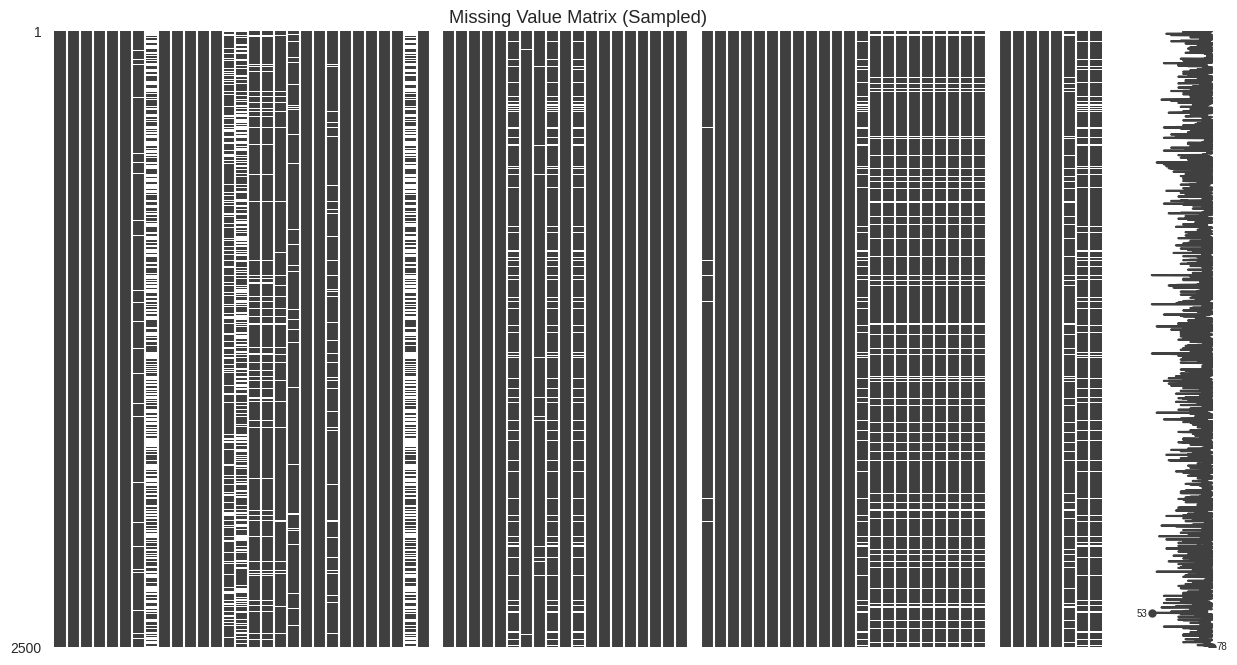

In [33]:
# Visualize missingness using missingno matrix plot
# Import missingno if not already done
try:
    import missingno as msno
    import matplotlib.pyplot as plt # Ensure matplotlib is imported
except ImportError:
    print("missingno library not found. Please install it (e.g., %pip install missingno)")
    msno = None

if 'df_listings' in locals() and msno:
    print("\nVisualizing Missing Value Matrix:")
    # Sample if the dataframe is large to avoid slow plotting/clutter
    sample_size = 2500 # Adjust sample size as needed
    if len(df_listings) > sample_size:
        print(f"(Plotting a sample of {sample_size} listings)")
        # Ensure the sample includes columns with missing data if possible
        # Taking sample first might exclude sparse missing data, so maybe plot full if not too huge
        df_sample = df_listings.sample(sample_size, random_state=42)
    else:
        df_sample = df_listings

    # Adjust figsize and fontsize for better readability if needed
    msno.matrix(df_sample, figsize=(15, 8), fontsize=8)
    plt.title('Missing Value Matrix (Sampled)')
    plt.show()
else:
    print("Error: df_listings not found or missingno library not imported.")

*Observation:* The matrix plot provides a visual overview of data completeness across the sampled listings. It clearly highlights columns with substantial missing data (appearing as white vertical bands) and confirms that missingness often occurs in blocks for certain listings (e.g., multiple review columns missing together for the same listing, represented by horizontal white segments across those columns).

### Visualize Missing Value Correlation Heatmap
Plot a heatmap to understand if the presence or absence of data in one column is correlated with the presence or absence in others. Values near 1 indicate columns tend to be missing together; values near -1 indicate one tends to be present when the other is missing.


Visualizing Missing Value Correlation Heatmap:
(Displaying heatmap for top 40 columns with missing values by count)


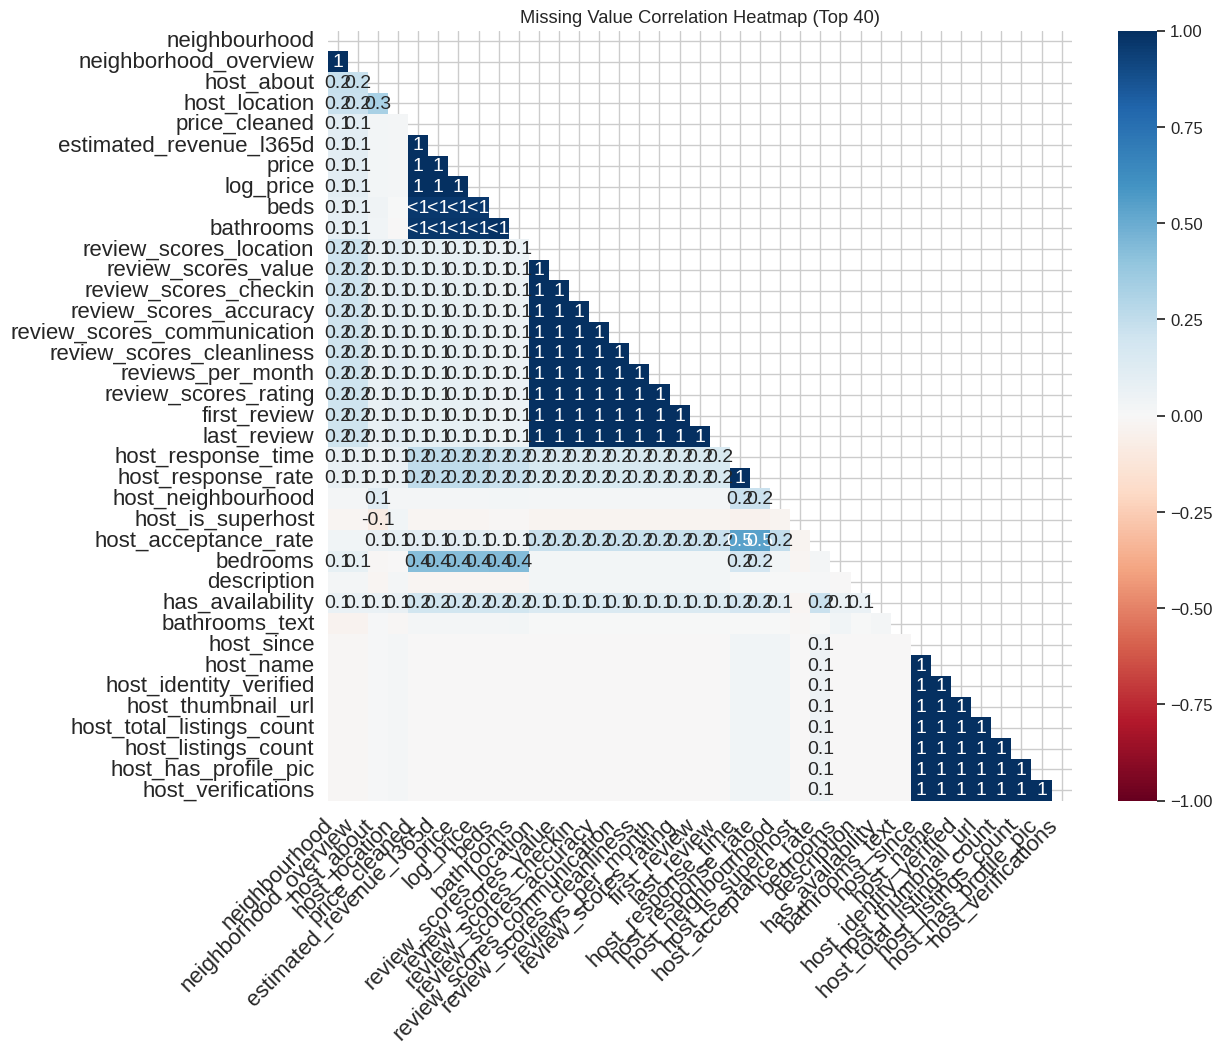

In [34]:
# Visualize missingness correlation using missingno heatmap
if 'df_listings' in locals() and msno and 'missing_df' in locals() and not missing_df.empty:
    print("\nVisualizing Missing Value Correlation Heatmap:")

    # Get list of columns that actually have missing values from our previous calculation
    cols_with_na = missing_df.index.tolist()

    if len(cols_with_na) > 1: # Heatmap needs at least 2 columns
        # Limit number of columns plotted if there are too many, focusing on those with more missingness
        limit = 40 # Keep limit reasonable for readability
        if len(cols_with_na) > limit:
            # Select the top 'limit' columns with missing data based on the sorted missing_df
            cols_to_plot = cols_with_na[:limit]
            print(f"(Displaying heatmap for top {limit} columns with missing values by count)")
        else:
            cols_to_plot = cols_with_na

        # Plot the heatmap using the selected columns from the original DataFrame
        msno.heatmap(df_listings[cols_to_plot], figsize=(12, 10))
        plt.title(f'Missing Value Correlation Heatmap (Top {len(cols_to_plot)})')
        plt.show()
    elif len(cols_with_na) == 1:
         print(f"Only one column ({cols_with_na[0]}) has missing data. Cannot generate heatmap.")
    else:
        # This case should technically be covered by the check on missing_df, but included for completeness
        print("No columns with missing data found. Cannot generate heatmap.")
elif 'missing_df' in locals() and missing_df.empty:
    print("No columns with missing data found. Cannot generate heatmap.")
else:
    print("Error: df_listings not found, missingno not imported, or missing_df not created.")

Based on the missing value analysis, the following initial actions are planned for the Data Preparation phase:

**1. Drop Columns:**
*   **100% Missing:** `neighbourhood_group_cleansed`, `calendar_updated`, `license`. (Reason: No information).
*   **High Missingness / Redundant:** `neighbourhood` (Reason: >50% missing, redundant with `neighbourhood_cleansed`), `neighborhood_overview` (Reason: >50% missing text).
*   **Consider Dropping:** `host_about` (39% missing), `host_location` (23% missing). (Reason: High missingness, text-based, can start simple).
*   **Redundant/Replaced:** `bathrooms` (Reason: ~12% missing, will parse `bathrooms_text` instead).

**2. Drop Rows:**
*   **Missing Target:** Drop rows where `price_cleaned` (or `log_price`) is `NaN`. (Reason: Cannot train/evaluate without the target variable, affects ~12.9% of data).

**3. Impute Columns (Requires Strategy Finalization):**
*   **Review Block (~9.65% missing):** (`review_scores_*`, `first_review`, `last_review`, `reviews_per_month`)
    *   *Strategy:* Likely impute `reviews_per_month` with 0. For scores, consider 0 or mean/median conditioned on having reviews (maybe add a `has_reviews` flag). Features derived from dates (`days_since_last_review`) will need NaN handling (e.g., impute with 0 or a large value).
*   **Listing Characteristics:** `beds` (~12.4%), `bedrooms` (~2.7%).
    *   *Strategy:* Impute with median, possibly grouped by `property_type`.
*   **Host Response (~9.2% missing):** `host_response_time`, `host_response_rate`.
    *   *Strategy:* Impute time with a 'Missing' category; impute rate with mean/median.
*   **Other Host Info:** `host_is_superhost` (~4.2%), `host_acceptance_rate` (~3.9%).
    *   *Strategy:* Impute superhost with mode (0); impute acceptance rate with mean/median.
*   **Text/Low Missingness:** `description` (~2.4%), `bathrooms_text` (~0.2%).
    *   *Strategy:* Impute description with empty string if used; impute `bathrooms_text` with mode or drop the few rows.
*   **Single Missing Host Details:** (e.g., `host_since`, `host_name`).
    *   *Strategy:* Drop the single affected row or impute with mode.

## 5. Data Type Examination

While `.info()` provided an initial overview, we now specifically examine columns stored as `object` type to identify those that actually represent other data formats (like dates, numbers, booleans, or lists) and will require conversion or parsing during Data Preparation. We will look for:
*   Potential date columns based on naming conventions.
*   Potential boolean columns containing only 't'/'f' values.
*   Potential numeric columns stored as strings (e.g., percentages).
*   Potential list-like columns stored as strings.
*   Specific known columns needing parsing (like `bathrooms_text`).

### Identify Columns with Object Dtype Requiring Conversion/Parsing
Programmatically check object columns for patterns suggesting underlying date, boolean, numeric, or list types.

In [41]:
import re
import pandas as pd
import numpy as np
import warnings # Import warnings module

if 'df_listings' in locals():
    print("Programmatically identifying object columns needing specific handling:\n")
    object_columns = df_listings.select_dtypes(include='object').columns
    
    potential_date_cols = []
    potential_bool_cols = []
    potential_url_cols = []
    potential_pct_cols = []
    potential_list_cols = []
    other_object_cols = []
    
    identified_cols = set(['price']) # Start with price as handled

    # Heuristics parameters
    sample_size = 100 # How many non-NA values to check for content patterns
    parsing_threshold = 0.8 # % of sample that must match pattern to classify

    # Suppress the specific UserWarning from pd.to_datetime during this check
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning) 
        
        for col in object_columns:
            if col in identified_cols: continue # Skip price

            non_na_series = df_listings[col].dropna()
            if non_na_series.empty:
                other_object_cols.append(col) 
                continue

            # --- Attempt Heuristics ---
            classified = False

            # 1. Heuristic: Check for Date Content
            try:
                sample_to_parse = non_na_series.iloc[:min(len(non_na_series), 5)] 
                parsed_dates = pd.to_datetime(sample_to_parse, errors='coerce')
                if parsed_dates.notna().all():
                    potential_date_cols.append(col)
                    identified_cols.add(col)
                    classified = True
            except Exception:
                 pass 

            # 2. Heuristic: Check for Boolean ('t'/'f') Content
            if not classified:
                unique_vals = non_na_series.unique()
                if set(unique_vals).issubset({'t', 'f'}) and len(unique_vals) > 0:
                     potential_bool_cols.append(col)
                     identified_cols.add(col)
                     classified = True
            
            # 3. Heuristic: Check for URL Content
            if not classified:
                url_pattern = re.compile(r'^(https?://|www\.)\S+$', re.IGNORECASE)
                check_limit = min(len(non_na_series), sample_size)
                match_count = non_na_series.iloc[:check_limit].astype(str).apply(lambda x: bool(url_pattern.match(x))).sum()
                if check_limit > 0 and match_count / check_limit >= parsing_threshold: 
                    potential_url_cols.append(col)
                    identified_cols.add(col)
                    classified = True

            # 4. Heuristic: Check for Percentage Content
            if not classified:
                check_limit = min(len(non_na_series), sample_size)
                # Check requires accessing string methods, ensure sample is string type
                non_na_sample_str = non_na_series.iloc[:check_limit].astype(str) 
                contains_pct = non_na_sample_str.str.contains('%').mean()
                try_numeric = pd.to_numeric(non_na_sample_str.str.replace('%','', regex=False), errors='coerce').notna().mean()
                if check_limit > 0 and contains_pct >= parsing_threshold and try_numeric >= parsing_threshold:
                     potential_pct_cols.append(col)
                     identified_cols.add(col)
                     classified = True

            # 5. Heuristic: Check for List-like Content (brackets/braces)
            if not classified:
                list_chars = ['[', ']', '{', '}']
                check_limit = min(len(non_na_series), sample_size)
                # Check requires accessing string methods, ensure sample is string type
                non_na_sample_str = non_na_series.iloc[:check_limit].astype(str) 
                contains_list_char = non_na_sample_str.apply(lambda x: any(char in x for char in list_chars)).mean()
                if check_limit > 0 and contains_list_char >= parsing_threshold: 
                     potential_list_cols.append(col)
                     identified_cols.add(col)
                     classified = True
                     
            # If not classified by any heuristic, add to 'Other'
            if not classified:
                other_object_cols.append(col)

    # --- Print Results ---
    print(f"-> Potential Date Columns (heuristic content check) ({len(potential_date_cols)}): {sorted(potential_date_cols)}")
    print(f"-> Potential Boolean ('t'/'f') Columns ({len(potential_bool_cols)}): {sorted(potential_bool_cols)}")
    print(f"-> Potential URL Columns (heuristic content check) ({len(potential_url_cols)}): {sorted(potential_url_cols)}")
    print(f"-> Potential Percentage Columns (heuristic content check) ({len(potential_pct_cols)}): {sorted(potential_pct_cols)}")
    print(f"-> Potential List Columns (heuristic content check) ({len(potential_list_cols)}): {sorted(potential_list_cols)}")
    # Manually add known list columns if heuristic missed them (safer)
    known_missed_list = ['amenities', 'host_verifications'] 
    for k_col in known_missed_list:
        if k_col in other_object_cols:
            potential_list_cols.append(k_col); other_object_cols.remove(k_col); identified_cols.add(k_col)
            potential_list_cols = sorted(list(set(potential_list_cols))) # Ensure unique and sorted
    if known_missed_list: print(f"   (Manually added/verified known list columns: {known_missed_list})")
        
    # Manually add known parse columns if heuristic missed them (safer)
    known_missed_parse = ['bathrooms_text']
    identified_parse_cols = []
    for k_col in known_missed_parse:
         if k_col in other_object_cols:
             identified_parse_cols.append(k_col); other_object_cols.remove(k_col); identified_cols.add(k_col)
    if identified_parse_cols: print(f"-> Specific Text Columns for Parsing (known): {sorted(identified_parse_cols)}")


    print(f"\n-> Other Object Columns ({len(other_object_cols)}) needing review (Categorical? Text?):")
    print(sorted(other_object_cols))

else:
    print("Error: df_listings not found.")

Programmatically identifying object columns needing specific handling:

-> Potential Date Columns (heuristic content check) (5): ['calendar_last_scraped', 'first_review', 'host_since', 'last_review', 'last_scraped']
-> Potential Boolean ('t'/'f') Columns (5): ['has_availability', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'instant_bookable']
-> Potential URL Columns (heuristic content check) (5): ['host_picture_url', 'host_thumbnail_url', 'host_url', 'listing_url', 'picture_url']
-> Potential Percentage Columns (heuristic content check) (2): ['host_acceptance_rate', 'host_response_rate']
-> Potential List Columns (heuristic content check) (2): ['amenities', 'host_verifications']
   (Manually added/verified known list columns: ['amenities', 'host_verifications'])
-> Specific Text Columns for Parsing (known): ['bathrooms_text']

-> Other Object Columns (13) needing review (Categorical? Text?):
['description', 'host_about', 'host_location', 'host_name', 'host_n

The examination of `object` columns reveals the following necessary actions for the Data Preparation phase:

1.  **Convert to Datetime:** `calendar_last_scraped`, `first_review`, `host_since`, `last_review`, `last_scraped`.
2.  **Convert to Numeric/Boolean:** `has_availability`, `host_has_profile_pic`, `host_identity_verified`, `host_is_superhost`, `instant_bookable`. (Convert 't'/'f' to 1/0).
3.  **Clean and Convert to Numeric:** `host_acceptance_rate`, `host_response_rate`. (Remove '%' and convert to float).
4.  **Parse List-like Strings:** `amenities`, `host_verifications`. (Extract items to create features like `num_amenities`, specific amenity flags, `num_verifications`).
5.  **Drop Columns:**
    *   URLs: `host_picture_url`, `host_thumbnail_url`, `host_url`, `listing_url`, `picture_url`.
    *   Text Identifiers: `host_name`, `name`, `description`.
    *   Redundant/High Missing Location Text: `neighbourhood`, `host_neighbourhood` (verify redundancy), `host_location`.
    *   High Missing Descriptive Text: `neighborhood_overview`, `host_about`.
    *   Metadata: `source` (verify if constant).
    *   Not needed: `bathrooms_text`, `id`, `scrape_id`, `host_id`.
6.  **Handle as Categorical (Requires Encoding):**
    *   `host_response_time` (Low cardinality, e.g., ordinal or one-hot).
    *   `neighbourhood_cleansed` (Potentially high cardinality, e.g., target encoding, grouping).
    *   `property_type` (Moderate/High cardinality, e.g., one-hot or grouping).
    *   `room_type` (Low cardinality, one-hot).

This systematic identification ensures that columns are appropriately formatted before modeling or feature engineering.

## 6. Unique Values & Cardinality Analysis

This step analyzes the number of unique values (cardinality) in each column. This helps us understand:
*   Which columns are constant (only one value) and can be dropped.
*   Which columns have low cardinality (few unique values), suitable for categorical encoding like one-hot encoding.
*   Which columns have high cardinality (many unique values), indicating IDs, free text, or categorical features requiring special handling (like target encoding, grouping, or dropping).

### Calculate Unique Value Counts
Compute the number of unique values for every column in the dataset.

In [43]:
if 'df_listings' in locals():
    print("Calculating number of unique values per column:")
    unique_counts = df_listings.nunique(dropna=False).sort_values() # dropna=False counts NaN as a unique value if present
    
    print(f"\nTotal number of columns: {len(df_listings.columns)}")
    print(f"Number of columns checked for unique values: {len(unique_counts)}")
    
    print("\nUnique value counts (sorted):")
    with pd.option_context('display.max_rows', None): # Show all rows
        display(unique_counts)
else:
    print("Error: df_listings not found.")

Calculating number of unique values per column:

Total number of columns: 81
Number of columns checked for unique values: 81

Unique value counts (sorted):


last_scraped                                        1
scrape_id                                           1
neighbourhood_group_cleansed                        1
calendar_last_scraped                               1
calendar_updated                                    1
license                                             1
instant_bookable                                    2
source                                              2
host_is_superhost                                   3
has_availability                                    3
host_identity_verified                              3
host_has_profile_pic                                3
room_type                                           4
host_response_time                                  5
host_verifications                                  6
calculated_host_listings_count_shared_rooms         6
accommodates                                       16
bedrooms                                           16
bathrooms                   

*Observation:* The unique value counts confirm several columns have only 1 unique value (`last_scraped`, `scrape_id`, etc.) and are constant. Many potential boolean columns show 2 or 3 unique values (representing True, False, and potentially NaN). Low-cardinality categoricals like `room_type` (4) and `host_response_time` (5) are identified. Columns like `property_type` and `neighbourhood_cleansed` show moderate cardinality (~52), while others like review scores, location identifiers (`host_neighbourhood`, `host_location`), text fields (`description`, `name`, `amenities`), IDs (`id`, `host_id`), URLs, coordinates (`latitude`, `longitude`), and the target (`price_cleaned`, `log_price`) show progressively higher to very high cardinality. This provides a clear basis for categorizing columns in the subsequent steps.

### Identify Constant Columns
Find columns that have only one unique value (excluding NaN if present, or only NaN). These columns provide no predictive information.

In [44]:
if 'unique_counts' in locals():
    # Columns where nunique (excluding NA) is 1 or 0
    # Or columns where nunique (including NA) is 1 (meaning only NA or only one value)
    # A simpler check is often nunique() without dropna=False and checking for <= 1
    
    # Let's use nunique() without dropna=False and check for 1 or 2 (value + NaN)
    # More robust: check nunique(dropna=True) == 1 or nunique(dropna=True) == 0
    
    unique_counts_no_na = df_listings.nunique(dropna=True)
    constant_cols_strict = unique_counts_no_na[unique_counts_no_na <= 1].index.tolist()
    
    # Additionally check columns previously identified as 100% missing
    cols_100_missing = ['neighbourhood_group_cleansed', 'calendar_updated', 'license'] # From previous analysis
    constant_cols = sorted(list(set(constant_cols_strict + cols_100_missing)))
                                
    print(f"Columns with 0 or 1 unique non-NaN value (or 100% missing): ({len(constant_cols)})")
    print(constant_cols)
else:
    print("Error: unique_counts not calculated yet.")

Columns with 0 or 1 unique non-NaN value (or 100% missing): (6)
['calendar_last_scraped', 'calendar_updated', 'last_scraped', 'license', 'neighbourhood_group_cleansed', 'scrape_id']


*Observation:* Six columns were identified as having zero or one unique value (excluding NaNs) or being entirely empty. These columns (`calendar_last_scraped`, `calendar_updated`, `last_scraped`, `license`, `neighbourhood_group_cleansed`, `scrape_id`) provide no variance and should be dropped during Data Preparation.

### Identify Low Cardinality Columns
List columns with a small number of unique values (e.g., 2 to ~20), suggesting they are suitable for one-hot encoding.

In [45]:
if 'unique_counts' in locals():
    # Define threshold for low cardinality (adjust as needed)
    low_cardinality_threshold = 20 
    
    # Select columns with > 1 unique value (not constant) and <= threshold
    # Using nunique(dropna=False) to capture categories including potential NaN category
    low_cardinality_cols = unique_counts[
        (unique_counts > 1) & (unique_counts <= low_cardinality_threshold)
    ].sort_values()
                                
    print(f"Low Cardinality Columns (2 to {low_cardinality_threshold} unique values including NaN): ({len(low_cardinality_cols)})")
    display(low_cardinality_cols)
else:
    print("Error: unique_counts not calculated yet.")

Low Cardinality Columns (2 to 20 unique values including NaN): (12)


instant_bookable                                2
source                                          2
host_is_superhost                               3
has_availability                                3
host_identity_verified                          3
host_has_profile_pic                            3
room_type                                       4
host_response_time                              5
host_verifications                              6
calculated_host_listings_count_shared_rooms     6
accommodates                                   16
bedrooms                                       16
dtype: int64

*Observations:*
*   Several columns suitable for one-hot encoding were identified, including boolean flags (`instant_bookable`, `host_is_superhost`, etc. - showing 2 or 3 unique values including NaN), `room_type` (4), and `host_response_time` (5).
*   `host_verifications` and `calculated_host_listings_count_shared_rooms` also fall into this low cardinality range.
*   Notably, `accommodates` and `bedrooms`, while inherently ordinal/numeric, appear with only 16 unique values each in this dataset, placing them technically within the low cardinality threshold defined (<20). While they *could* be one-hot encoded, they will likely be treated as numerical features in Data Preparation, possibly after imputation.

### Identify High Cardinality Columns
List columns with a very large number of unique values (e.g., > 50 or a percentage of total rows), suggesting they might be IDs, free text, or categorical features needing special handling.

In [46]:
if 'unique_counts' in locals():
    # Define threshold for high cardinality (adjust as needed)
    # Can be absolute or relative to number of rows
    high_cardinality_threshold = 50 # Example: Consider > 50 unique values as potentially high
    num_rows = len(df_listings)
    
    # Select columns with > threshold unique values
    high_cardinality_cols = unique_counts[unique_counts > high_cardinality_threshold].sort_values(ascending=False)
                                
    print(f"High Cardinality Columns (> {high_cardinality_threshold} unique values including NaN): ({len(high_cardinality_cols)})")
    
    # Display potentially separating IDs/Text from potential high-cardinality categoricals
    potential_ids_text = ['id', 'listing_url', 'name', 'description', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url']
    
    print("\nLikely IDs / Text / URLs:")
    display(high_cardinality_cols[high_cardinality_cols.index.isin(potential_ids_text)])
    
    print("\nPotential High-Cardinality Categorical / Other:")
    display(high_cardinality_cols[~high_cardinality_cols.index.isin(potential_ids_text)])
    
else:
    print("Error: unique_counts not calculated yet.")

High Cardinality Columns (> 50 unique values including NaN): (56)

Likely IDs / Text / URLs:


id                    10108
listing_url           10108
picture_url            9796
name                   9639
description            7896
host_url               3284
host_id                3284
host_thumbnail_url     3116
host_picture_url       3116
host_about             1476
host_name              1398
dtype: int64


Potential High-Cardinality Categorical / Other:


amenities                                      9173
longitude                                      6997
latitude                                       6257
estimated_revenue_l365d                        5948
price_cleaned                                  3293
price                                          3293
log_price                                      3293
neighborhood_overview                          2920
first_review                                   2813
host_since                                     2286
last_review                                     906
reviews_per_month                               809
number_of_reviews                               577
maximum_nights_avg_ntm                          413
availability_365                                366
availability_eoy                                292
neighbourhood                                   217
minimum_nights_avg_ntm                          214
host_location                                   187
review_score

This analysis examined the number of unique values in each column to understand their nature and inform Data Preparation strategies:

**1. Columns Identified for Dropping:**
*   **Constant Columns:** `calendar_last_scraped`, `calendar_updated`, `last_scraped`, `license`, `neighbourhood_group_cleansed`, `scrape_id` (and potentially `source` if verified as constant) were found to have only one unique value (or be entirely empty) and provide no predictive information. They should be dropped.
*   **High-Cardinality IDs/URLs:** `id`, `listing_url`, `picture_url`, `host_id`, `host_url`, `host_name`, `host_thumbnail_url`, `host_picture_url` have extremely high cardinality, acting primarily as identifiers or links, and should be dropped.

**2. Columns Identified for Specific Handling in Data Preparation:**
*   **Low-Cardinality Categoricals (<= 20 unique):** Columns like `instant_bookable`, `source` (if kept), `host_is_superhost`, `has_availability`, `host_identity_verified`, `host_has_profile_pic`, `room_type`, and `host_response_time` are suitable candidates for **One-Hot Encoding**.
*   **High-Cardinality Categoricals (> 50 unique):** `neighbourhood_cleansed` (~52 unique) and `property_type` (~52 unique) are key categorical features but have too many unique values for one-hot encoding. They will require special handling, such as **Target Encoding, Frequency Encoding, grouping less frequent categories**, or using models like CatBoost. (Similar consideration for `host_neighbourhood` if kept).
*   **List-like Strings:** `amenities` and `host_verifications` show high unique string counts, confirming they need **parsing** to extract meaningful features (e.g., counts, flags), not direct encoding.

## 7. Outlier Detection (Initial Look)

In this step, we perform a preliminary check for potential outliers in key numeric columns. Outliers are extreme values that lie far from the bulk of the data and might distort statistical analyses or model performance. We will:
*   Re-examine descriptive statistics (min, max, percentiles) for suspicious values.
*   Visualize distributions using box plots to identify points lying far beyond the typical range (whiskers).
Decisions on how to handle these potential outliers (e.g., capping, transformation, removal, or relying on robust models) will be made during Data Preparation.

### Review Descriptive Statistics for Key Numeric Columns
Focus on numeric columns likely related to pricing or listing constraints, examining their min, max, and percentile values for potentially unrealistic or extreme entries.

In [47]:
if 'df_listings' in locals():
    # Select key numeric columns for outlier inspection
    # Focus on size, stay duration, counts, and potentially host metrics
    key_numeric_cols_outlier = [
        'price_cleaned', 'log_price', # Include target for context
        'accommodates', 'bedrooms', 'beds',
        'minimum_nights', 'maximum_nights', 
        # 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', # Compare later if needed
        'availability_365', # Example availability
        'number_of_reviews', 'number_of_reviews_ltm',
        'review_scores_rating', # Example score
        'host_listings_count', 'calculated_host_listings_count' # Example host metric
        ] 

    # Filter out columns not present in the DataFrame or not numeric
    key_numeric_cols_outlier = [
        col for col in key_numeric_cols_outlier 
        if col in df_listings.columns and pd.api.types.is_numeric_dtype(df_listings[col])
        ]
    
    if key_numeric_cols_outlier:
        print("Descriptive Statistics for Key Numeric Columns (Focusing on Outliers):")
        # Include specific percentiles like 1%, 5%, 95%, 99% to better see tails
        display(df_listings[key_numeric_cols_outlier].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)
    else:
        print("No relevant numeric columns found for outlier check.")
        
else:
    print("Error: df_listings not found.")

Descriptive Statistics for Key Numeric Columns (Focusing on Outliers):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
price_cleaned,8808.00,2730.52,8349.63,223.00,500.00,692.00,1242.75,1762.00,2641.00,5967.15,15000.00,251025.00
log_price,8808.00,7.54,0.67,5.41,6.22,6.54,7.13,7.47,7.88,8.69,9.62,12.43
accommodates,10108.00,4.04,2.54,1.00,1.00,2.00,2.00,4.00,5.00,9.00,14.00,16.00
bedrooms,9832.00,1.39,1.00,0.00,0.00,0.00,1.00,1.00,2.00,3.00,5.00,34.00
beds,8854.00,2.51,2.21,0.00,0.00,1.00,1.00,2.00,3.00,6.00,12.00,32.00
minimum_nights,10108.00,3.78,19.79,1.00,1.00,1.00,1.00,2.00,2.00,6.00,30.00,730.00
maximum_nights,10108.00,498.33,399.96,1.00,8.00,28.00,365.00,365.00,1124.00,1125.00,1125.00,3333.00
availability_365,10108.00,170.51,117.93,0.00,0.00,0.00,60.00,166.00,274.25,354.00,365.00,365.00
number_of_reviews,10108.00,75.04,114.21,0.00,0.00,0.00,5.00,28.00,92.00,319.65,524.86,1922.00
number_of_reviews_ltm,10108.00,20.51,24.42,0.00,0.00,0.00,1.00,10.00,34.00,68.00,88.00,331.00


*Observations from Statistics:*
*   **`price_cleaned`:** Confirms extreme high-end outliers. The 99th percentile is 15,000, while the max is over 250,000. The mean (2730) is significantly pulled up by these outliers compared to the median (1762).
*   **`log_price`:** Shows a much smaller difference between mean (7.54) and median (7.47), and the max (12.43) is less extreme relative to the 99th percentile (9.62), though still indicating some high-end outliers even on the log scale.
*   **`accommodates`, `bedrooms`, `beds`:** The max values (16, 34, 32) seem high but potentially real for very large properties. The 99th percentiles are significantly lower (14, 5, 12 respectively), suggesting these max values represent rare cases. Bedrooms=0 and Beds=0 at the minimum might need investigation (studio apartments?).
*   **`minimum_nights`:** The max value of 730 is extremely high compared to the 99th percentile of 30 and the 75th percentile of 2. This strongly suggests outliers that likely need capping.
*   **`maximum_nights`:** The max value (3333) is also extremely high compared to the 95th/99th percentile (1125). Many listings seem to allow stays up to ~1125 days (possibly a default long-stay limit), but the few values above that might be outliers needing capping. The median is 365 (one year).
*   **`availability_365`:** Ranges plausibly from 0 to 365.
*   **`number_of_reviews`, `number_of_reviews_ltm`:** Max values are high (1922, 331) but represent popular listings. The distribution is very skewed (compare mean vs median).
*   **`review_scores_rating`:** Min is 1.00, max is 5.00. The 1st percentile is 3.33, suggesting very few extremely low scores.
*   **`host_listings_count`, `calculated_host_listings_count`:** Max values are very high (3315, 101) compared to 99th percentiles (264, 85), indicating potential super-hosts or property managers with large portfolios, likely representing outliers in terms of host size.

### Visualize Potential Outliers with Box Plots
Generate box plots for these key numeric columns to get a visual representation of the distributions and potential outliers (points beyond the whiskers).

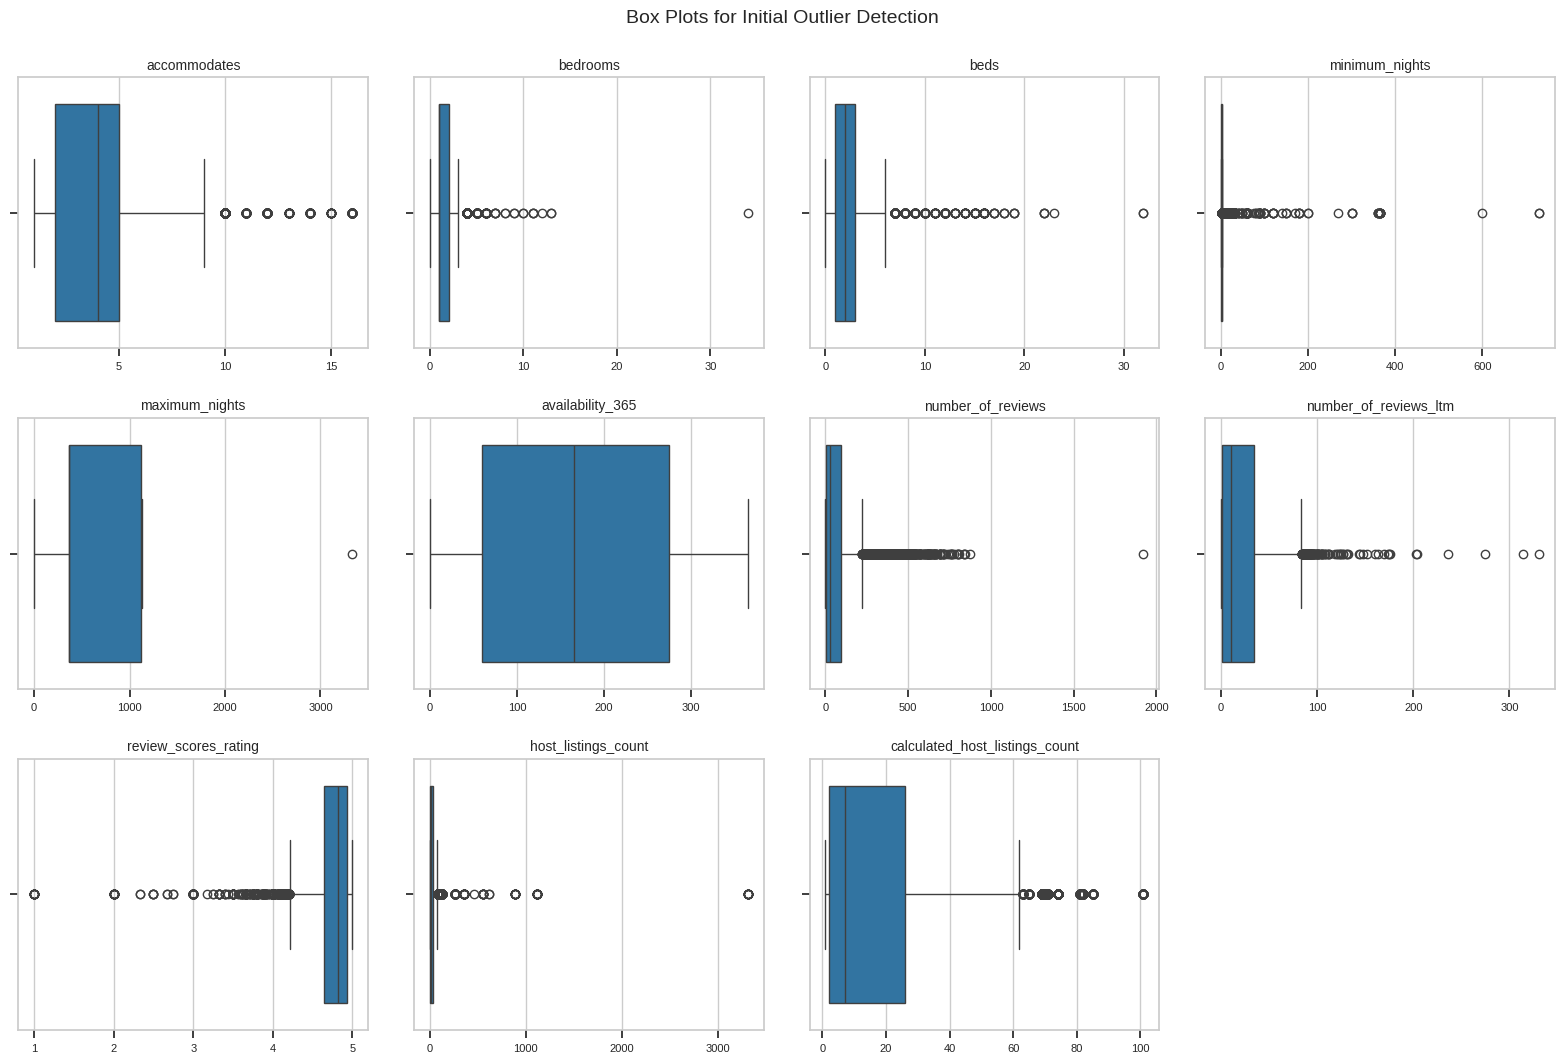

In [48]:
# Box plots for key numeric columns (excluding price/log_price, already plotted)
if 'df_listings' in locals() and 'key_numeric_cols_outlier' in locals() and key_numeric_cols_outlier:
    
    # Select columns for plotting (exclude target variables already seen)
    plot_cols_outlier = [
        col for col in key_numeric_cols_outlier 
        if col not in ['price_cleaned', 'log_price'] 
        ]

    if plot_cols_outlier:
        n_cols = 4 # Adjust layout
        n_rows = (len(plot_cols_outlier) - 1) // n_cols + 1

        plt.figure(figsize=(n_cols * 4, n_rows * 3.5)) # Adjust size
        for i, col in enumerate(plot_cols_outlier):
            plt.subplot(n_rows, n_cols, i + 1)
            # Convert to float for plotting robustness if Int64 is present
            sns.boxplot(x=df_listings[col].astype(float)) 
            plt.title(f'{col}', fontsize=10) # Use column name as title
            plt.xlabel('') # Keep it clean
            plt.xticks(fontsize=8) # Adjust font size if needed

        plt.tight_layout(pad=1.5) # Add padding
        plt.suptitle('Box Plots for Initial Outlier Detection', y=1.02, fontsize=14) # Add main title
        plt.show()
    else:
        print("No columns selected for box plotting.")

The preliminary outlier analysis, using both descriptive statistics (min, max, percentiles) and box plot visualizations, revealed potential outliers in several key numeric columns:

1.  **Stay Duration:** `minimum_nights` and `maximum_nights` exhibit extremely high maximum values (e.g., 730, 3333) far exceeding the bulk of the data (e.g., 99th percentile for min_nights is 30). These appear as significant outliers in the box plots.
    *   **Data Prep Focus:** These columns will almost certainly require **capping** at a reasonable maximum threshold (e.g., based on percentiles like 99th, or a domain-sensible limit like 90 or 180 days for `minimum_nights`) to avoid distorting models.
2.  **Price:** The target variable `price_cleaned` shows extreme high-end outliers. While log-transformation (`log_price`) helps, some outliers persist even on the log scale.
    *   **Data Prep Focus:** Primarily rely on the **log transformation** (`log_price`) for modeling. Further outlier handling on `log_price` might be considered but could remove genuinely high-end (luxury) listings. Relying on robust models might be preferable to aggressive removal.
3.  **Counts & Sizes:** Columns like `accommodates`, `bedrooms`, `beds`, `number_of_reviews*`, and `host_listings_count*` show right-skewed distributions with many data points identified as outliers in the box plots (beyond the whiskers), even if the absolute maximum values aren't necessarily errors (e.g., large houses, popular listings, super hosts).
    *   **Data Prep Focus:** Consider the nature of these outliers. Log transformations might help normalize some count distributions. Capping at a high percentile (e.g., 99th) could be an option for extreme host counts. Alternatively, **tree-based models** (Random Forest, Gradient Boosting) are generally less sensitive to these types of monotonic outliers than linear models, potentially reducing the need for aggressive handling. Address the `bedrooms=0`/`beds=0` minimums during cleaning/imputation.
4.  **Review Scores:** `review_scores_rating` shows some potential low-end outliers.
    *   **Data Prep Focus:** These are less likely to be errors and might represent genuinely poorly rated listings. Usually, **no specific outlier handling** is needed unless strong evidence suggests data entry errors.

## 8. Initial Relationship Visualization

In this section, we create initial visualizations to understand how some key features potentially relate to the target variable (`log_price`). This helps identify important predictors and observe potential trends or differences between groups. We will look at:
*   The relationship between `log_price` and categorical features like `room_type` and `neighbourhood_cleansed`.
*   The relationship between `log_price` and numerical features representing size, like `accommodates`, `bedrooms`, and `beds`.

### Relationship between Price and Room Type
Visualize how the log-transformed price varies across different room types using a box plot. Order by median price for clarity.

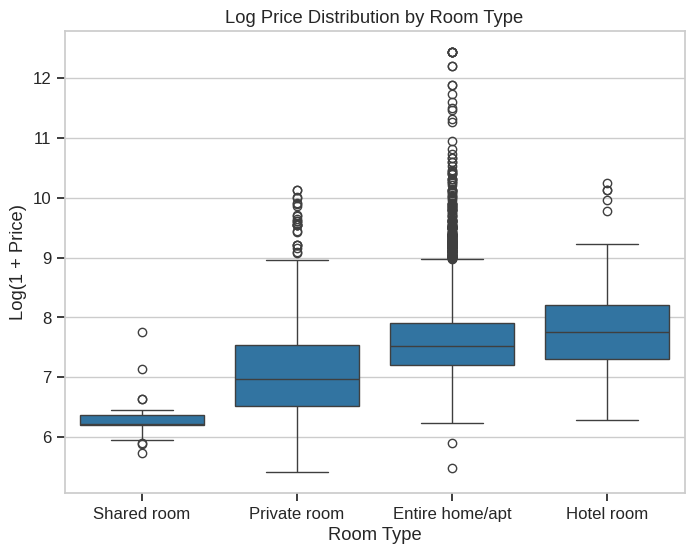

In [49]:
# Price vs. Room Type
if 'df_listings' in locals() and 'log_price' in df_listings.columns and 'room_type' in df_listings.columns:
    # Calculate order based on median log_price
    room_type_order = df_listings.groupby('room_type')['log_price'].median().sort_values().index
    
    plt.figure(figsize=(8, 6)) # Adjusted size for fewer categories
    sns.boxplot(data=df_listings.dropna(subset=['log_price']), # Ensure no NaNs in target for plot
                x='room_type', 
                y='log_price', 
                order=room_type_order)
    plt.title('Log Price Distribution by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Log(1 + Price)')
    # plt.xticks(rotation=45, ha='right') # Rotation likely not needed for few categories
    plt.show()
else:
    print("Error: df_listings or required columns ('log_price', 'room_type') not found.")

*Observation:* The box plot clearly shows a strong relationship between `room_type` and price. There are distinct differences in the distributions: `Entire home/apt` has the highest median `log_price` and the widest spread (indicating more price variability within this category), followed closely by `Hotel room`. `Private room` has a significantly lower median price, and `Shared room` has the lowest median price and the tightest distribution. This confirms `room_type` is a highly relevant predictor.

### Relationship between Price and Neighbourhood
Visualize how the log-transformed price varies across different neighbourhoods. Since there might be many neighbourhoods, we'll plot the top N by median price.

Plotting boxplot for top 20 neighbourhoods by median log_price.


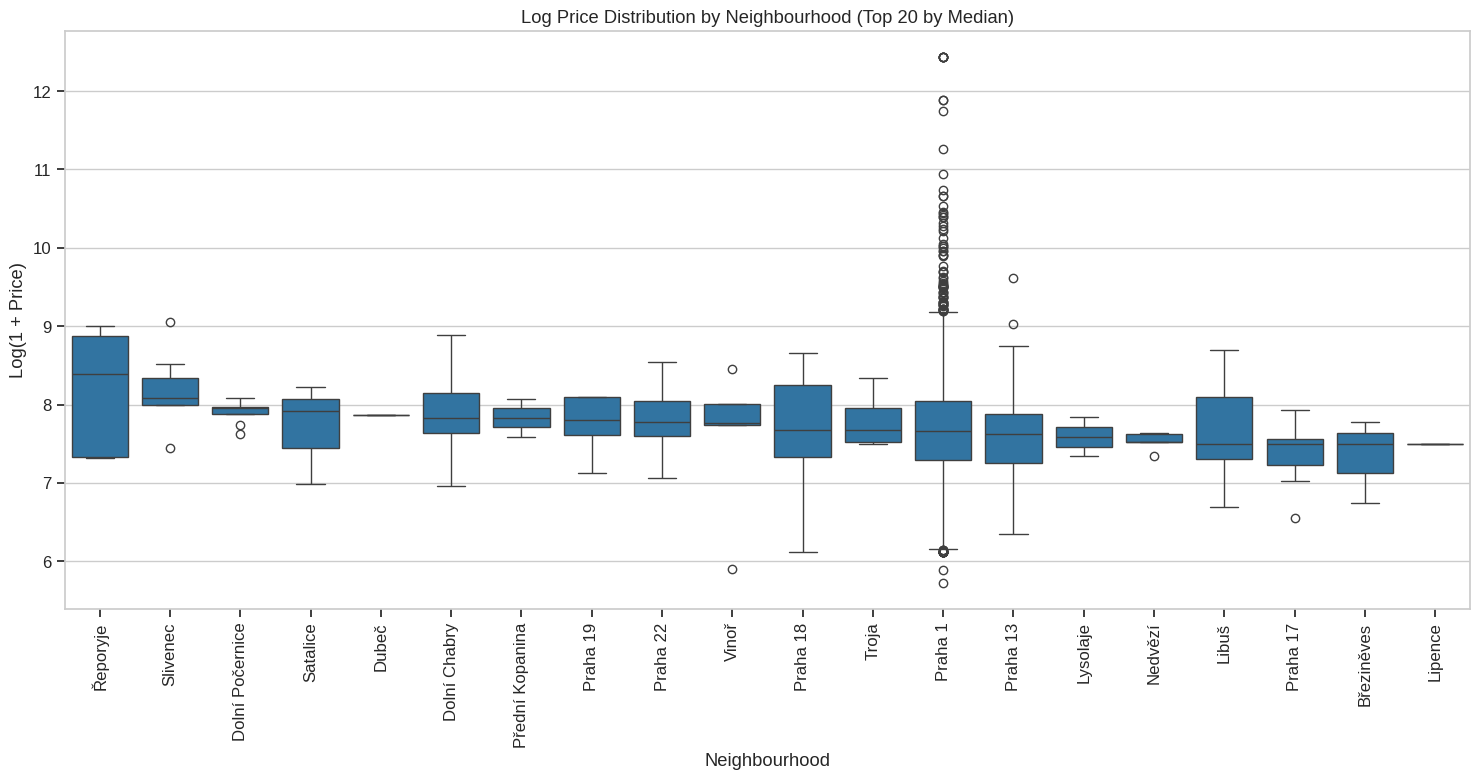

In [50]:
# Price vs. Neighbourhood (plotting top N by median price)
if 'df_listings' in locals() and 'log_price' in df_listings.columns and 'neighbourhood_cleansed' in df_listings.columns:
    
    # Drop rows where log_price is NaN before grouping/plotting
    df_plot_data = df_listings.dropna(subset=['log_price'])

    if not df_plot_data.empty:
        # Calculate median price per neighborhood for ordering
        neighbourhood_median_prices = df_plot_data.groupby('neighbourhood_cleansed')['log_price'].median().sort_values(ascending=False)

        # Limit number of neighbourhoods to plot for clarity
        num_neighbourhoods_to_plot = 20 # Adjust as needed
        if len(neighbourhood_median_prices) > num_neighbourhoods_to_plot:
            top_neighbourhoods = neighbourhood_median_prices.head(num_neighbourhoods_to_plot).index
            print(f"Plotting boxplot for top {num_neighbourhoods_to_plot} neighbourhoods by median log_price.")
        else:
            top_neighbourhoods = neighbourhood_median_prices.index # Plot all if fewer than limit
            print(f"Plotting boxplot for all {len(top_neighbourhoods)} neighbourhoods.")
        
        # Filter data for plotting only the selected neighbourhoods
        df_plot_filtered = df_plot_data[df_plot_data['neighbourhood_cleansed'].isin(top_neighbourhoods)]

        plt.figure(figsize=(15, 8)) # Adjust figure size
        sns.boxplot(data=df_plot_filtered,
                    x='neighbourhood_cleansed', 
                    y='log_price', 
                    order=top_neighbourhoods) # Order by median price
        plt.title(f'Log Price Distribution by Neighbourhood (Top {len(top_neighbourhoods)} by Median)')
        plt.xlabel('Neighbourhood')
        plt.ylabel('Log(1 + Price)')
        plt.xticks(rotation=90) # Rotate labels for readability
        plt.tight_layout() # Adjust layout
        plt.show()
    else:
        print("No valid data to plot after dropping NaN log_price.")

else:
    print("Error: df_listings or required columns ('log_price', 'neighbourhood_cleansed') not found.")

*Observation:* Confirming the importance of location, this plot shows significant variation in `log_price` distributions across the top 20 Prague neighbourhoods (ordered by median price). Neighbourhoods like Řeporyje, Slivenec, and Praha 1 exhibit higher median prices compared to others like Březiněves or Lipence within this top group. The spread of prices (interquartile range and whiskers) also differs, with some neighbourhoods (like Praha 1) showing a very wide range and numerous high-end outliers, while others have tighter distributions. This reinforces that `neighbourhood_cleansed` will be a crucial, albeit high-cardinality, predictor variable.

### Relationship between Price and Size Metrics
Visualize how log-transformed price relates to listing size indicators like `accommodates`, `bedrooms`, and `beds` using scatter plots.

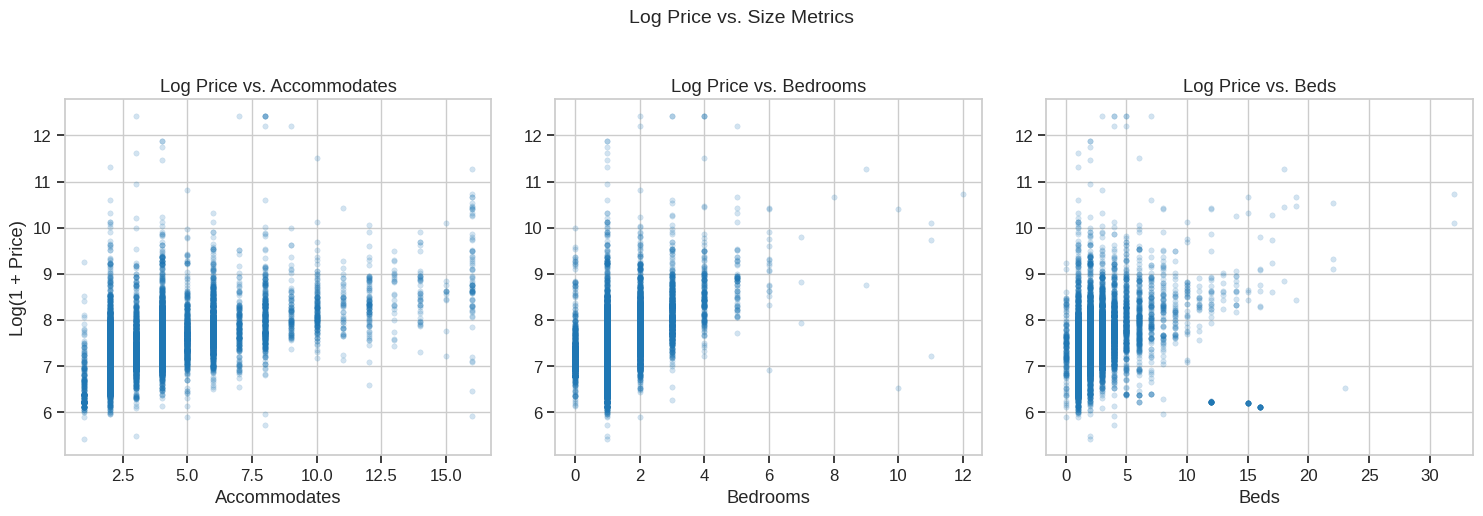

In [51]:
# Price vs. Accommodates / Bedrooms / Beds (using log_price)
if 'df_listings' in locals() and 'log_price' in df_listings.columns:
    
    # Columns to plot
    scatter_cols = ['accommodates', 'bedrooms', 'beds']
    
    # Ensure columns exist and are numeric before proceeding
    valid_scatter_cols = [
        col for col in scatter_cols 
        if col in df_listings.columns and pd.api.types.is_numeric_dtype(df_listings[col])
        ]

    if valid_scatter_cols:
        # Drop rows where log_price or any of the scatter_cols are NaN for plotting
        df_plot_scatter = df_listings[['log_price'] + valid_scatter_cols].dropna()

        if not df_plot_scatter.empty:
            n_cols = len(valid_scatter_cols)
            plt.figure(figsize=(n_cols * 5, 5)) # Adjust size
            
            for i, col in enumerate(valid_scatter_cols):
                plt.subplot(1, n_cols, i + 1)
                # Use scatterplot with low alpha for dense areas
                sns.scatterplot(data=df_plot_scatter, x=col, y='log_price', alpha=0.2, s=15, edgecolor=None) 
                # Optional: Add a regression line to see linear trend
                # sns.regplot(data=df_plot_scatter, x=col, y='log_price', scatter_kws={'alpha':0.1, 's':10}, line_kws={'color':'red'})
                plt.title(f'Log Price vs. {col.replace("_", " ").capitalize()}')
                plt.xlabel(col.replace("_", " ").capitalize())
                plt.ylabel('Log(1 + Price)' if i == 0 else '') # Only label y-axis once

            plt.suptitle('Log Price vs. Size Metrics', y=1.03, fontsize=14)
            plt.tight_layout(pad=1.0)
            plt.show()
        else:
            print("No valid data to plot after dropping NaNs for scatter plots.")
    else:
        print("None of the specified columns for scatter plots (accommodates, bedrooms, beds) are valid numeric columns.")

else:
    print("Error: df_listings or 'log_price' column not found.")

*Observation:* The scatter plots reveal a generally positive trend between `log_price` and size metrics (`accommodates`, `bedrooms`, `beds`). As the capacity or number of rooms/beds increases, the log price tends to increase. However, the relationship is not strictly linear, and there is significant variance in price for listings of the same size (indicated by the vertical spread of points for each x-value). This suggests that while size is an important factor, other characteristics heavily influence price within each size category. The relationship might be stronger for `bedrooms` than for `accommodates` or `beds` (visually, the upward trend seems slightly clearer for bedrooms). Note the presence of `bedrooms=0` (likely studios) which have a wide price range.

*   **Data Preparation Focus:**
    *   Ensure `room_type`, `neighbourhood_cleansed`, `accommodates`, `bedrooms`, and `beds` are appropriately cleaned, imputed (if necessary), and encoded/treated for modeling, as they are clearly important predictors.
    *   Given the importance but high cardinality of `neighbourhood_cleansed`, selecting an appropriate encoding strategy (e.g., target encoding) will be critical.
    *   The variance observed suggests interaction effects might be important (e.g., the effect of size might differ by neighbourhood or room type). Consider exploring interaction features.
*   **Further Data Visualization Focus:**
    *   Create visualizations for other potentially important features identified earlier (e.g., `log_price` vs. `host_is_superhost`, review scores, `minimum_nights`, engineered date features like `host_duration`, parsed `bathrooms_text`, key amenities flags).
    *   Generate a correlation matrix for all *cleaned* numeric features after Data Preparation.
    *   Use geospatial plots (if using `neighbourhoods.geojson`) to visualize the price variations across the map of Prague, potentially colored by neighbourhood or room type.
    *   Consider plots to explore potential interactions (e.g., faceting scatter plots by `room_type` or `neighbourhood`).

## 9. Data Understanding Summary & Next Steps

This initial exploration of the Prague Airbnb listings data (March 16, 2025 snapshot) provides a foundational understanding necessary for building a price prediction model. Key findings and implications for the subsequent Data Preparation phase are summarized below:

**1. Dataset Overview:**
*   The dataset contains 10,108 listings described by 79 features.
*   A mix of data types (`int64`, `float64`, `object`) exists, requiring significant type conversion and cleaning.

**2. Target Variable (`price`):**
*   The `price` column, stored as text (object), required cleaning (removing '$', ',') and was converted to a numeric format (`price_cleaned`, Int64).
*   Price distribution is extremely right-skewed (skewness ~23.4). Log-transformation (`log_price = np.log1p(price_cleaned)`) yields a much more symmetrical (though still slightly skewed, ~1.21) distribution, which is strongly recommended as the target variable for modeling.
*   Approximately 12.9% of listings are missing price information. **Action:** These rows *must be dropped* in Data Preparation.

**3. Missing Data:**
*   **High Missingness:** Columns `neighbourhood_group_cleansed`, `calendar_updated`, `license` are empty (100% missing). `neighbourhood`, `neighborhood_overview`, `host_about`, `host_location` have high missingness (>20-50%). **Action:** Drop empty columns. Drop `neighbourhood` (redundant). Consider dropping other high-missing text columns (`neighborhood_overview`, `host_about`, `host_location`) initially for simplicity. Drop `bathrooms` (will parse `bathrooms_text`).
*   **Moderate/Patterned Missingness:** Review-related columns (`review_scores_*`, `first/last_review`, `reviews_per_month`, ~9.65%) and host response columns (`host_response_time`/`rate`, ~9.2%) show moderate missingness, often correlated (e.g., listings without reviews). Key features like `beds` (~12.4%) and `bedrooms` (~2.7%) also have missing values. **Action:** Requires careful imputation strategies in Data Preparation (e.g., using 0 for `reviews_per_month`, median for `beds`/`bedrooms`, 'Missing' category for `host_response_time`, potentially creating a `has_reviews` flag).

**4. Data Types & Formatting:**
*   Multiple `object` columns require specific handling. **Action:**
    *   Convert date-related columns (`last_scraped`, `host_since`, etc.) to datetime.
    *   Convert boolean columns ('t'/'f') like `host_is_superhost`, `instant_bookable` to numeric (1/0).
    *   Clean and convert percentage strings (`host_response_rate`, `host_acceptance_rate`) to numeric floats.
    *   Parse list-like strings (`amenities`, `host_verifications`) to extract features.
    *   Parse `bathrooms_text` to extract numeric bathroom count.

**5. Cardinality & Feature Characteristics:**
*   **Constant Columns:** `calendar_last_scraped`, `scrape_id`, etc. identified as constant. **Action:** Drop these columns.
*   **IDs/URLs:** Columns like `id`, `listing_url`, `host_id`, `host_name`, etc., have high cardinality acting as identifiers. **Action:** Drop these columns.
*   **Text:** `name`, `description`. **Action:** Consider dropping initially or engineer simple features (e.g., length).
*   **Low-Cardinality Categoricals:** `room_type`, `host_response_time`, boolean flags. **Action:** Apply One-Hot Encoding.
*   **High-Cardinality Categoricals:** `neighbourhood_cleansed`, `property_type`. **Action:** Require special encoding (e.g., Target Encoding, grouping).
*   **Numeric:** Coordinates, counts, scores, availability metrics identified. **Action:** Handle as standard numeric features (imputation, scaling).

**6. Potential Outliers:**
*   Extreme outliers identified in `minimum_nights` and `maximum_nights`. **Action:** Apply capping (e.g., based on 99th percentile).
*   Numerous outliers observed in `price` (even after log transform), counts (`accommodates`, `number_of_reviews`, `host_listings_count`), and sizes (`bedrooms`, `beds`). **Action:** Primarily rely on log-transform for price. For others, consider capping or relying on outlier-robust models (e.g., tree-based). Investigate `bedrooms=0`/`beds=0`. Low-end review scores likely represent genuine low ratings.

**7. Initial Relationships:**
*   Strong relationships observed between `log_price` and `room_type` (categorical difference) and `neighbourhood_cleansed` (location matters).
*   Positive, though noisy, trends observed between `log_price` and size metrics (`accommodates`, `bedrooms`, `beds`).
*   **Action:** Confirms these are key predictors to focus on during cleaning, imputation, encoding, and feature engineering in Data Preparation. Suggests exploring potential interaction features.

**Summary for Data Preparation:** The next phase will focus on executing the actions identified above: dropping irrelevant/empty/redundant columns and rows missing the target, converting data types, parsing complex strings (amenities, bathrooms), imputing missing values strategically, handling outliers (especially stay durations), encoding categorical features appropriately based on cardinality, and potentially engineering new features (e.g., from dates, text length, interactions).